In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df1 = pd.read_csv('calendar.txt')  # Same as reading a .csv
df1.head()


,service_id,monday,tuesday,wednesday,thursday,friday,saturday,sunday,start_date,end_date
0,weekday,1,1,1,1,1,0,0,20190101,20251231
1,saturday,0,0,0,0,0,1,0,20190101,20251231
2,sunday,0,0,0,0,0,0,1,20190101,20251231


In [ ]:
routes_df = pd.read_csv('routes.txt')  
routes_df.head()

,route_id,agency_id,route_short_name,route_long_name,route_desc,route_type,route_url,route_color,route_text_color,route_sort_order,continuous_pickup,continuous_drop_off
0,33,NaN,R_SP_R,RAPID_Phase 3 (Rapid Metro) to Sector 55-56 (R...,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,31,NaN,G_DD_R,GRAY_Dhansa Bus Stand to Dwarka,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
2,29,NaN,P_MS_R,PINK_Shiv Vihar to Majlis Park,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
3,12,NaN,M_JB,MAGENTA_Janak Puri West to Botanical Garden,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,P_MS,PINK_Majlis Park to Shiv Vihar,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
shapes_df  = pd.read_csv('shapes.txt')  
shapes_df .head()

,shape_id,shape_pt_lat,shape_pt_lon,shape_pt_sequence,shape_dist_traveled
0,shp_1_2,28.615887,77.022461,1,0.000
1,shp_1_2,28.616341,77.022499,2,50.510
2,shp_1_2,28.617985,77.022453,3,233.586
3,shp_1_2,28.618252,77.022453,4,263.487
4,shp_1_2,28.618425,77.022438,5,282.857


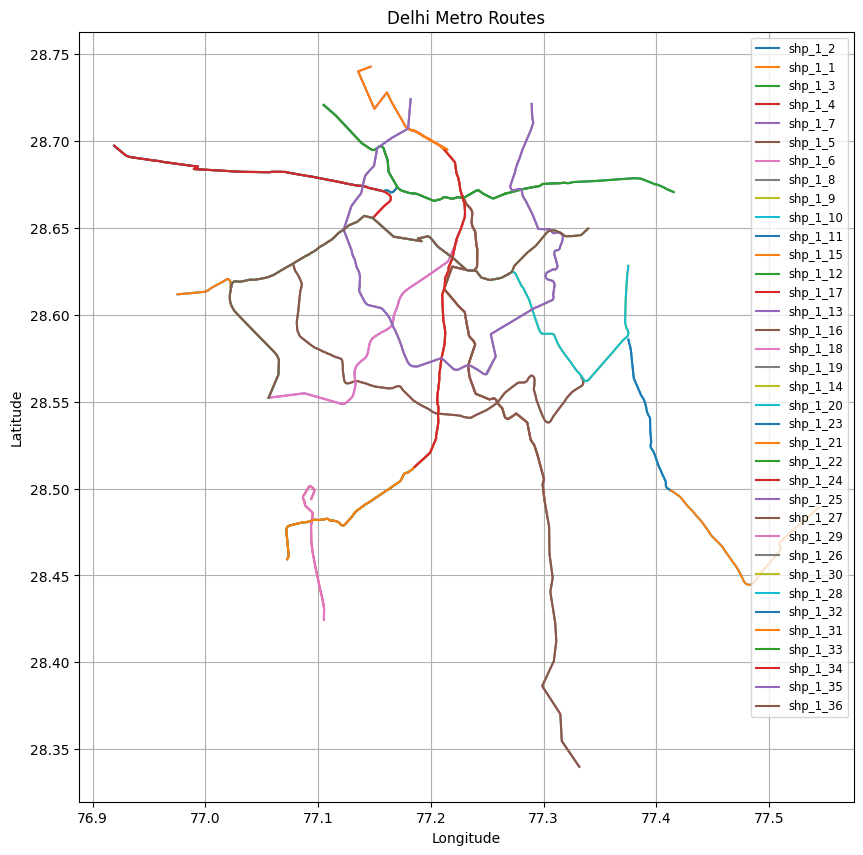

In [ ]:
# Convert to numeric just in case
shapes_df['shape_pt_lat'] = pd.to_numeric(shapes_df['shape_pt_lat'])
shapes_df['shape_pt_lon'] = pd.to_numeric(shapes_df['shape_pt_lon'])
# Plot each shape_id separately
plt.figure(figsize=(10, 10))
for shape_id in shapes_df['shape_id'].unique():
    shape = shapes_df[shapes_df['shape_id'] == shape_id].sort_values('shape_pt_sequence')
    plt.plot(shape['shape_pt_lon'], shape['shape_pt_lat'], label=shape_id)

plt.title('Delhi Metro Routes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='best', fontsize='small')
plt.grid(True)
plt.show()


#### Delhi Metro Route Visualization

This plot displays the geographical paths of all Delhi Metro lines using latitude and longitude coordinates 

- Each colored line represents a different `shape_id`, which corresponds to a route pattern.
- This visualization helps understand the spatial coverage and network layout of the Delhi Metro system.
- Useful for:
  - Analyzing how well different areas of Delhi are connected.
  - Identifying regions with lower accessibility or metro density.
  - Comparing the length and orientation of different routes.




In [ ]:

# Load stops.txt
stops_df = pd.read_csv("stops.txt")
print(stops_df.head())


,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled,timepoint,continuous_pickup,continuous_drop_off
0,0,05:28:08,05:28:28,21,0,NaN,0,0,0.000,1,NaN,NaN
1,0,05:30:58,05:31:18,20,1,NaN,0,0,1202.405,1,NaN,NaN
2,0,05:33:28,05:33:48,19,2,NaN,0,0,2480.750,1,NaN,NaN
3,0,05:35:33,05:35:53,18,3,NaN,0,0,3314.936,1,NaN,NaN
4,0,05:37:53,05:38:13,17,4,NaN,0,0,4300.216,1,NaN,NaN


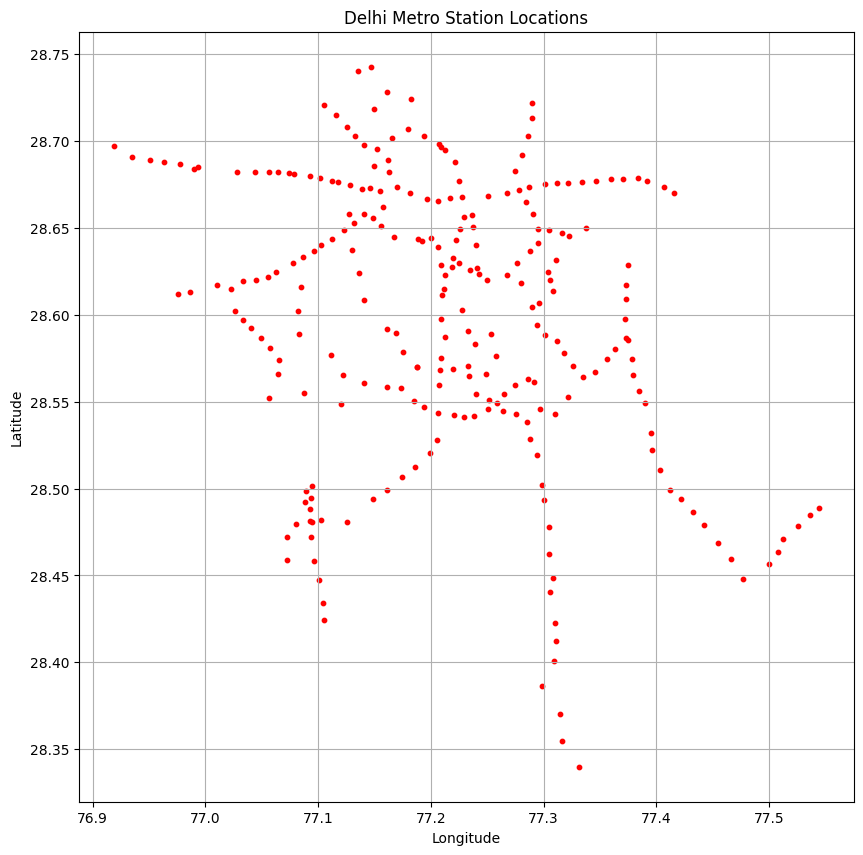

In [36]:

plt.figure(figsize=(10, 10))
plt.scatter(stops_df['stop_lon'], stops_df['stop_lat'], c='red', s=10)
plt.title("Delhi Metro Station Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


###  Delhi Metro Station stop location

This scatter plot shows the geographical distribution of all stop of  Delhi Metro stations using latitude and longitude data`.

- Each red dot represents an individual metro station.
- The pattern reveals how the metro system is spread across Delhi and surrounding areas.
- Densely clustered areas indicate zones with high metro accessibility.
- Sparser regions may highlight opportunities for expanding the network or adding feeder services.

This plot is useful for analyzing stop coverage, planning accessibility improvements, and spotting areas with low metro presence.


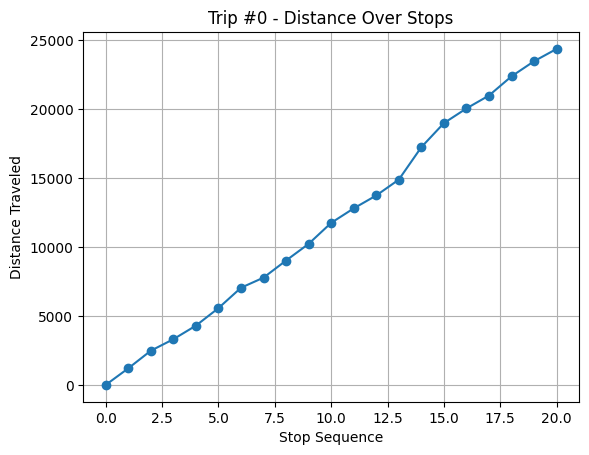

In [ ]:


trip_id_sample = 0  # pick a trip_id to visualize
sample_df = stops_df[stops_df['trip_id'] == trip_id_sample]

plt.plot(sample_df['stop_sequence'], sample_df['shape_dist_traveled'], marker='o')
plt.xlabel('Stop Sequence')
plt.ylabel('Distance Traveled')
plt.title(f'Trip #{trip_id_sample} - Distance Over Stops')
plt.grid(True)
plt.show()


### Trip Distance Over Stops

This line chart shows how the total distance traveled accumulates across each stop for a selected metro trip (`trip_id = 0`).

- The x-axis shows the sequence of stops along the trip.
- The y-axis shows the cumulative distance traveled 

####  Insights:
- Helps visualize how evenly spaced the stops are.
- Steeper segments indicate greater distances between stops.
- Useful for analyzing route efficiency and identifying large gaps that may benefit from intermediate stops or better coverage.

> Note: Distance is measured in meters and increases monotonically as the train progresses along its route.


In [ ]:
trips_df = pd.read_csv('trips.txt')  # Same as reading a .csv
trips_df.head()

,route_id,service_id,trip_id,trip_headsign,trip_short_name,direction_id,block_id,shape_id,wheelchair_accessible,bikes_allowed
0,0,weekday,0,NaN,NaN,NaN,NaN,shp_1_30,0,0
1,0,weekday,1,NaN,NaN,NaN,NaN,shp_1_30,0,0
2,0,weekday,10,NaN,NaN,NaN,NaN,shp_1_30,0,0
3,0,weekday,100,NaN,NaN,NaN,NaN,shp_1_30,0,0
4,2,weekday,1000,NaN,NaN,NaN,NaN,shp_1_13,0,0


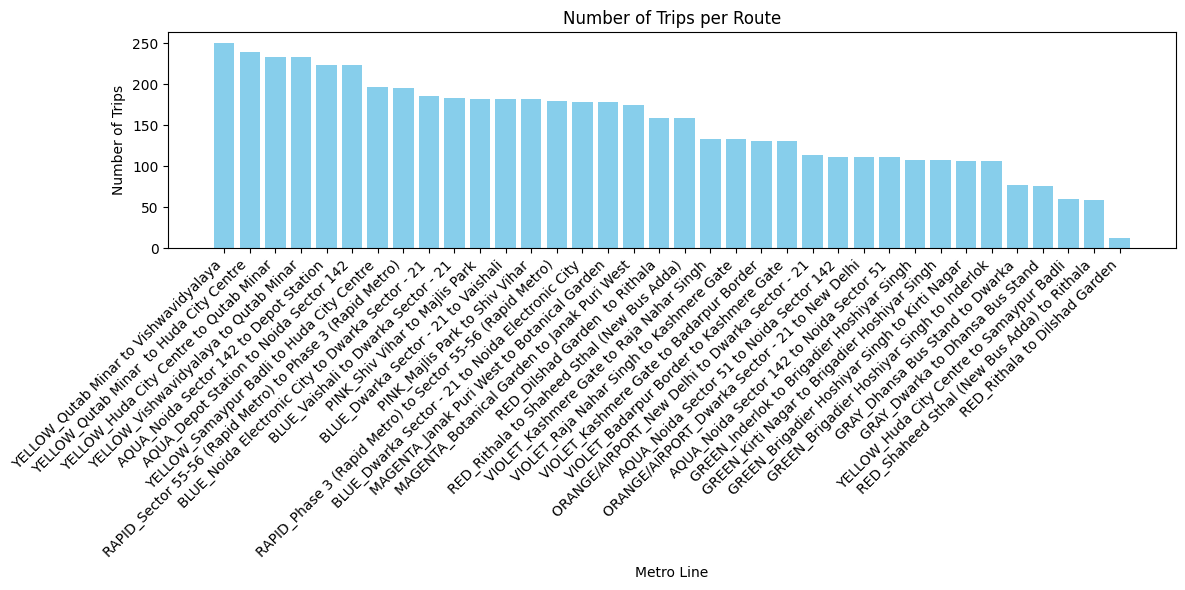

In [ ]:


# Count trips per route
trip_counts = trips_df['route_id'].value_counts().reset_index()
trip_counts.columns = ['route_id', 'trip_count']

# Add route names
trip_counts = trip_counts.merge(routes_df[['route_id', 'route_long_name']], on='route_id', how='left')

# Plot
plt.figure(figsize=(12, 6))
plt.bar(trip_counts['route_long_name'], trip_counts['trip_count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Metro Line")
plt.ylabel("Number of Trips")
plt.title("Number of Trips per Route")
plt.tight_layout()
plt.show()


###  Number of Trips per Metro Route

This bar chart shows how many scheduled trips run on each metro line
- The x-axis lists the metro lines
- The y-axis represents the number of trips operated on each line.

####  Insights:
- Heavily traveled lines like the Yellow and Blue lines have the most trips.
- Some routes have noticeably fewer scheduled services — may indicate low demand or specialized use (e.g., airport or feeder lines).
- Useful for analyzing service load, identifying overcrowded routes, and planning for route optimization or rebalancing frequencies.


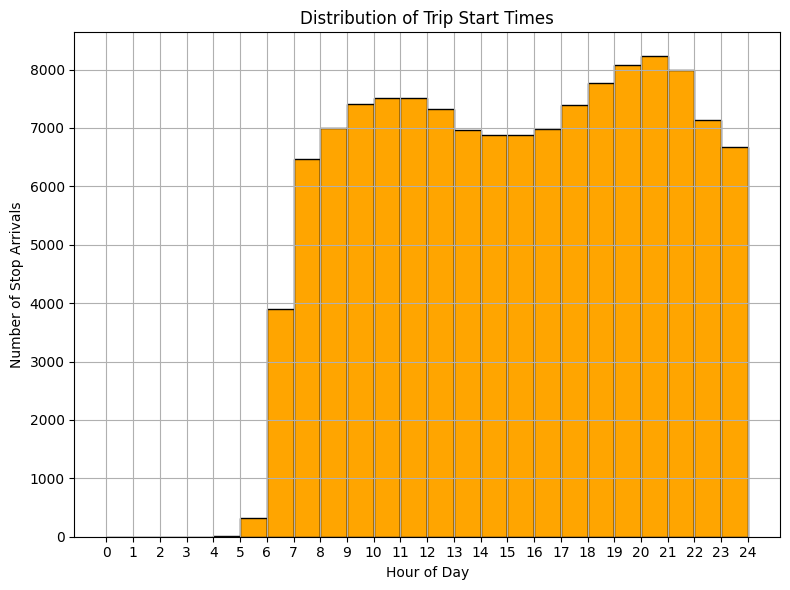

In [37]:

# Load stop_times.txt
stop_times_df = pd.read_csv("stop_times.txt")

# Convert arrival_time to hour
stop_times_df['hour'] = stop_times_df['arrival_time'].str.split(":").str[0].astype(int)

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(stop_times_df['hour'], bins=range(0, 25), edgecolor='black', color='orange')
plt.xticks(range(0, 25))
plt.xlabel("Hour of Day")
plt.ylabel("Number of Stop Arrivals")
plt.title("Distribution of Trip Start Times")
plt.grid(True)
plt.tight_layout()
plt.show()


### Distribution of Trip Start Times

This histogram shows how metro trips are distributed across different hours of the day, based on arrival/departure times from `stop_times.txt`.

- X-axis: Hour of the day (0 to 24)
- Y-axis: How many stop records occur during that hour

####  Key Observations:
- Clear peaks during 8–11 AM and 5–9 PM indicate commuter rush hours.
- Early morning (0–6 AM) and late night show low activity, which is typical for metro systems.
- This plot is useful for:
  - Optimizing train frequency based on real demand
  - Planning energy and staff requirements
  - Identifying low-traffic hours for maintenance and service adjustments


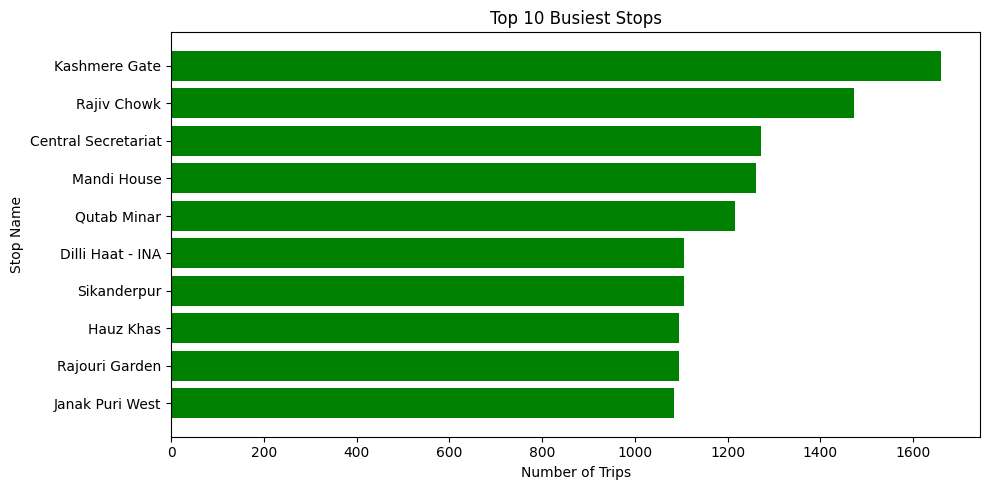

In [28]:
# Count number of stop usages
top_stops = stop_times_df['stop_id'].value_counts().head(10).reset_index()
top_stops.columns = ['stop_id', 'trip_count']

# Merge stop names
stops_df = pd.read_csv("stops.txt")
top_stops = top_stops.merge(stops_df[['stop_id', 'stop_name']], on='stop_id', how='left')

# Plot
plt.figure(figsize=(10, 5))
plt.barh(top_stops['stop_name'], top_stops['trip_count'], color='green')
plt.xlabel("Number of Trips")
plt.ylabel("Stop Name")
plt.title("Top 10 Busiest Stops")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


### Top 10 Busiest Metro Stops

This horizontal bar chart displays the 10 most frequently visited metro stops based on the number of scheduled trips
- The y-axis lists the stop names.
- The x-axis represents the number of trips that stop at each station.

####  Key Insights:
- Major interchange hubs like Kashmere Gate, Rajiv Chowk, and Central Secretariat experience the highest load.
- These are crucial for planning infrastructure upgrades, crowd management, and enhanced service frequency.
- This analysis helps prioritize maintenance, staffing, and capacity enhancements for high-demand locations.


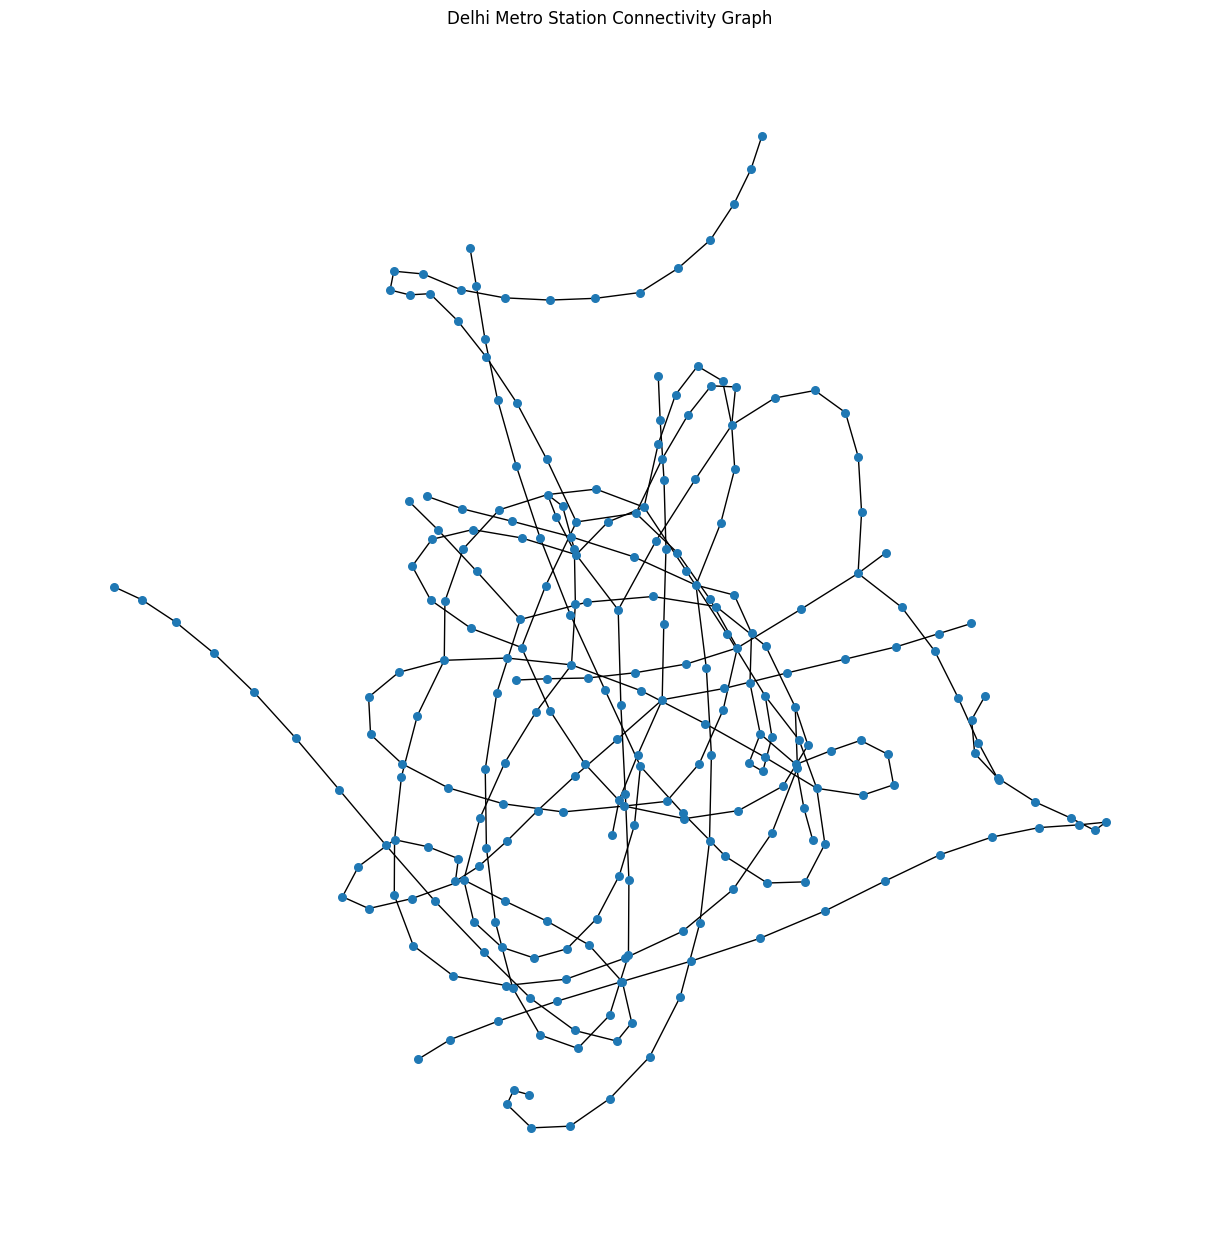

In [29]:
import networkx as nx

# Load stop_times and stops
stop_times_df = pd.read_csv("stop_times.txt")
stops_df = pd.read_csv("stops.txt")

# Sort and build edges from stop_times per trip
stop_times_df = stop_times_df.sort_values(['trip_id', 'stop_sequence'])
edges = []

for trip_id, group in stop_times_df.groupby('trip_id'):
    stops = list(group['stop_id'])
    edges += list(zip(stops, stops[1:]))

# Create graph
G = nx.Graph()
G.add_edges_from(edges)

# Optional: map stop IDs to names
stop_id_to_name = dict(zip(stops_df['stop_id'], stops_df['stop_name']))
G = nx.relabel_nodes(G, stop_id_to_name)

# Draw graph (simplified)
plt.figure(figsize=(12, 12))
nx.draw_spring(G, node_size=30, font_size=6, with_labels=False)
plt.title("Delhi Metro Station Connectivity Graph")
plt.show()


In [30]:
df6 = pd.read_csv('agency.txt')  # Same as reading a .csv
df6.head()

,agency_id,agency_name,agency_url,agency_timezone,agency_lang,agency_phone,agency_fare_url,agency_email
0,DMRC,Delhi Metro Rail Corporation,http://www.delhimetrorail.com/,Asia/Kolkata,NaN,NaN,NaN,NaN


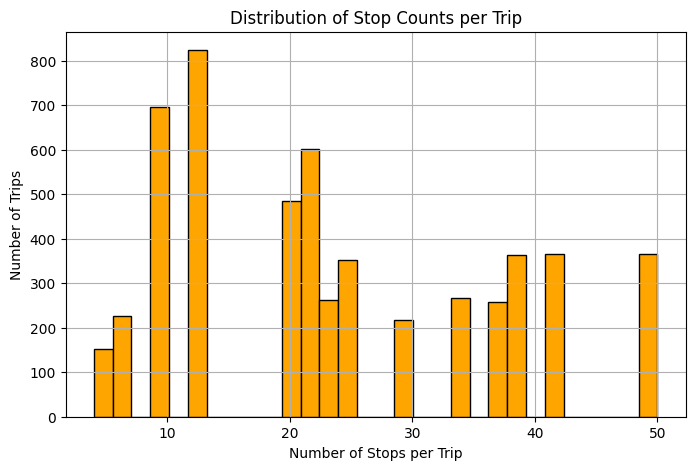

In [33]:
trip_stop_counts = stop_times_df.groupby('trip_id')['stop_id'].count().reset_index(name="stop_count")

plt.figure(figsize=(8, 5))
plt.hist(trip_stop_counts["stop_count"], bins=30, color='orange', edgecolor='black')
plt.xlabel("Number of Stops per Trip")
plt.ylabel("Number of Trips")
plt.title("Distribution of Stop Counts per Trip")
plt.grid(True)
plt.show()


### Distribution of Stop Counts per Trip

This histogram visualizes how many stops are included in each scheduled metro trip.

- **X-axis:** Number of stops per trip (i.e., how many stations a train visits on a single trip).
- **Y-axis:** Number of trips (i.e., how many trips have that specific number of stops).

#### Insights:
- The distribution helps identify the most common trip lengths in terms of stop count.
- Peaks in the histogram indicate typical trip lengths for the Delhi Metro system.
- Outliers (very short or very long trips) may represent special or express services.

This analysis is useful for understanding service patterns, planning schedules, and optimizing train operations based on trip complexity.

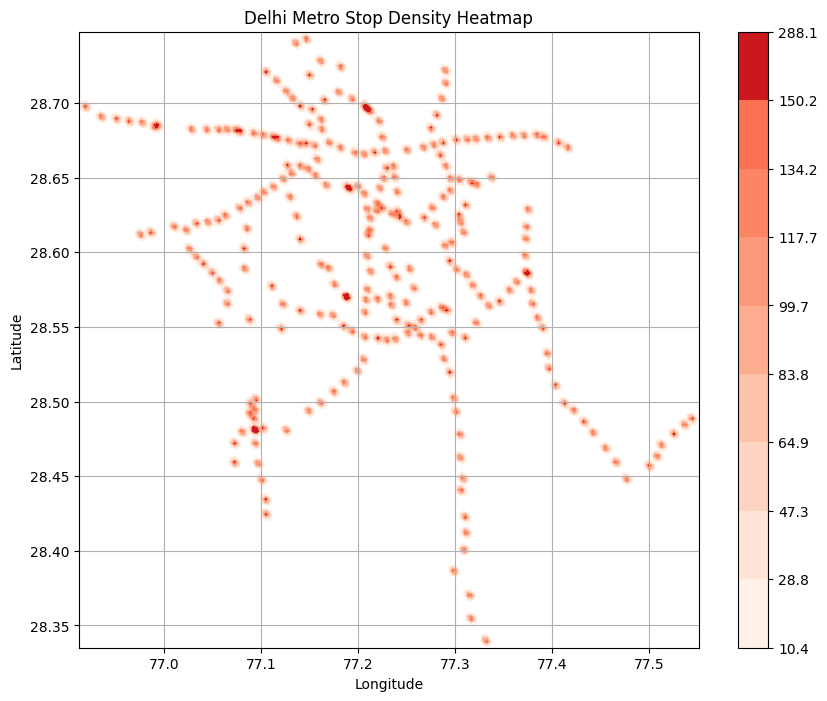

In [34]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.kdeplot(
    x=stops_df['stop_lon'], 
    y=stops_df['stop_lat'],
    cmap="Reds", fill=True, bw_adjust=0.05, cbar=True
)
plt.title("Delhi Metro Stop Density Heatmap")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()


## Delhi Metro Stop Density Heatmap

The heatmap below visualizes the **density of metro stops** across Delhi based on their geographical coordinates.

- **X-axis** represents the **Longitude**.
- **Y-axis** represents the **Latitude**.
- Each **red dot** marks a metro station.
- The **color intensity** indicates the density of stops:
  - **Darker red areas** show **high concentrations** of metro stations.
  - **Lighter red areas** indicate **sparser metro coverage**.
- The **color bar** on the right shows the density scale, ranging from low (light) to high (dark) values.

### Key Insights:
- Central and northern parts of Delhi show **high stop density**, reflecting better metro connectivity.
- Outskirts have **fewer metro stops**, indicating areas with less metro penetration.
- This visualization helps in understanding the **spread of metro infrastructure** and can assist in **urban planning and transit development**.
